In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier


## Next Step

Kfold

Tag

Count_Descriptionする

BERT特徴量

Target Encoding 

Optuna

Ensumble 

## Learning trend for the model

Benchmark: 
    
    310.88949952769605 (val) 360.22544 (test)

Add Word count for description and Loan use:
    
    302.439362173603 (val) 351.02701 (test)
    
Add tags count and tags null checker

    287.8709482227993 (val) 339.53605 (test)



In [66]:
train = pd.read_csv('after_processing.csv')
y = pd.read_csv('y.csv')
test = pd.read_csv('test.csv')

In [67]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state = 42)

In [68]:
params = {
    "application" : "regression_l1",
    "metric" : "l1" #mae
}

In [69]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

In [70]:
%%time
evaluation_results = {}
model = lgb.train(params,
                  train_set=lgb_train,
                  valid_sets=lgb_eval,
                  valid_names=["train"],  
                  evals_result=evaluation_results
                  )

[1]	train's l1: 464.612
[2]	train's l1: 449.436
[3]	train's l1: 436.282
[4]	train's l1: 422.485
[5]	train's l1: 412.208
[6]	train's l1: 402.833
[7]	train's l1: 395.874
[8]	train's l1: 388.113
[9]	train's l1: 379.245
[10]	train's l1: 373.663
[11]	train's l1: 369.261
[12]	train's l1: 365.049
[13]	train's l1: 361.131
[14]	train's l1: 358.115
[15]	train's l1: 355.164
[16]	train's l1: 348.349
[17]	train's l1: 345.548
[18]	train's l1: 340.075
[19]	train's l1: 337.671
[20]	train's l1: 335.101
[21]	train's l1: 333.11
[22]	train's l1: 329.863
[23]	train's l1: 326.465
[24]	train's l1: 324.892
[25]	train's l1: 323.157
[26]	train's l1: 321.141
[27]	train's l1: 319.584
[28]	train's l1: 317.175
[29]	train's l1: 315.073
[30]	train's l1: 314.344
[31]	train's l1: 313.359
[32]	train's l1: 312.568
[33]	train's l1: 311.746
[34]	train's l1: 310.535
[35]	train's l1: 309.423
[36]	train's l1: 308.049
[37]	train's l1: 307.121
[38]	train's l1: 306.712
[39]	train's l1: 306.197
[40]	train's l1: 305.931
[41]	train

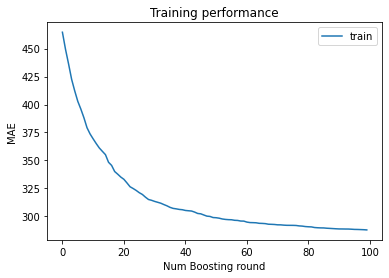

In [71]:
plt.plot(evaluation_results["train"]["l1"], label="train")
plt.ylabel("MAE")
plt.xlabel("Num Boosting round")
plt.title("Training performance")
plt.legend()
plt.show()

In [72]:
y_pred = model.predict(X_test)

In [73]:
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = " + str(MAE))

MAE = 287.8709482227993


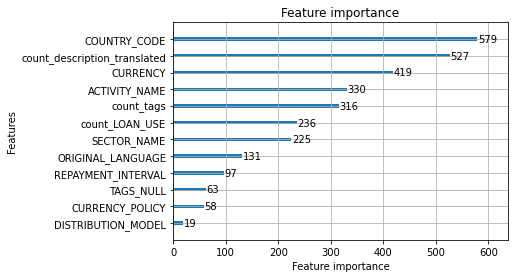

In [74]:
lgb.plot_importance(model)
plt.show()

In [75]:
train_columns = ["ORIGINAL_LANGUAGE", "ACTIVITY_NAME", "SECTOR_NAME", "COUNTRY_CODE","CURRENCY_POLICY",
       "CURRENCY","REPAYMENT_INTERVAL", "DISTRIBUTION_MODEL"]


In [76]:
test_X = test[train_columns]

for column in test_X.columns:
    le = LabelEncoder()
    target_column = test_X[column]
    le.fit(target_column)
    label_encoded_column = le.transform(target_column)
    test_X[column] = pd.Series(label_encoded_column).astype("int")



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
# Count the number of the translated description
test['count_description_translated'] = test['DESCRIPTION_TRANSLATED'].apply(lambda x: x.split()) 
test['count_description_translated'] = test['count_description_translated'].apply(lambda x: len(x)) 
test['count_LOAN_USE'] = test['LOAN_USE'].apply(lambda x: x.split()) 
test['count_LOAN_USE'] = test['count_LOAN_USE'].apply(lambda x: len(x)) 
test['TAGS_NULL'] = test['TAGS'].isnull() * 1

def change_tags(x): 
    x = x.split(',') 
    return x 
test['TAGS'] = test['TAGS'].fillna('NAN')
test['change_TAGS'] = test['TAGS'].apply(change_tags)
test['count_tags'] = test['change_TAGS'].apply(lambda x: len(x))

test.head()

,LOAN_ID,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,IMAGE_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,...,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,TAGS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,count_description_translated,count_LOAN_USE,TAGS_NULL,change_TAGS,count_tags
0,2041445,English,Marcela is 69 years old and married with ten c...,Marcela is 69 years old and married with ten c...,4051101,General Store,Retail,to buy items to sell like canned goods and per...,PH,Philippines,...,NaN,PHP,NAN,monthly,field_partner,77,12,0,[NAN],1
1,1944435,English,Roselia is 48 years old and has five children....,Roselia is 48 years old and has five children....,3410523,Pigs,Agriculture,to buy feeds and other supplies to raise her pig,PH,Philippines,...,NaN,PHP,"#Animals, #Repeat Borrower, #Schooling, #Woman...",monthly,field_partner,92,10,0,"[#Animals, #Repeat Borrower, #Schooling, #W...",5
2,2083354,English,"Ma. Marebil is a single woman, 40 years old wi...","Ma. Marebil is a single woman, 40 years old wi...",4146690,Clothing Sales,Clothing,to buy additional stock of clothes and dresses...,PH,Philippines,...,NaN,PHP,"#Parent, #Single Parent, #Woman-Owned Business",monthly,field_partner,64,10,0,"[#Parent, #Single Parent, #Woman-Owned Busin...",3
3,1993565,English,"Good day, lenders! Meet one of KBMI’s clients,...","Good day, lenders! Meet one of KBMI’s clients,...",3945982,Food,Food,to buy more foods to grow her business.,ID,Indonesia,...,0.1,IDR,"#Woman-Owned Business, #Schooling, #Elderly, #...",monthly,field_partner,153,8,0,"[#Woman-Owned Business, #Schooling, #Elderly...",4
4,2064272,English,Rosemarie is a married woman with two children...,Rosemarie is a married woman with two children...,4114040,Food,Food,to buy ingredients for her food production bus...,PH,Philippines,...,NaN,PHP,NAN,monthly,field_partner,80,8,0,[NAN],1


In [81]:
numerical = test[['count_description_translated', 'count_LOAN_USE','TAGS_NULL','count_tags']]
test = pd.concat([test_X, numerical], axis=1)

In [82]:
test_predicted = model.predict(test)

In [83]:
submit_df = pd.read_csv('sample_submission.csv')

In [84]:
test_predicted = (np.round(test_predicted/25)*25).astype(int)
submit_df["LOAN_AMOUNT"]=test_predicted
print(submit_df)

       LOAN_ID  LOAN_AMOUNT
0      2041445          400
1      1944435          425
2      2083354          475
3      1993565          525
4      2064272          400
...        ...          ...
91817  1993862          325
91818  2015070           75
91819  1950349          375
91820  1921580         1525
91821  1976733          500

[91822 rows x 2 columns]


In [85]:
submit_df.to_csv('submission.csv',index=False)

In [54]:
train = pd.read_csv('after_processing.csv')
y = pd.read_csv('y.csv')
test = pd.read_csv('test.csv')

In [59]:
train_columns = ["ORIGINAL_LANGUAGE", "ACTIVITY_NAME", "SECTOR_NAME", "COUNTRY_CODE","CURRENCY_POLICY",
       "CURRENCY","REPAYMENT_INTERVAL", "DISTRIBUTION_MODEL"]

In [60]:
test_X = test[train_columns]

for column in test_X.columns:
    le = LabelEncoder()
    target_column = test_X[column]
    le.fit(target_column)
    label_encoded_column = le.transform(target_column)
    test_X[column] = pd.Series(label_encoded_column).astype("int")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
# Count the number of the translated description
test['count_description_translated'] = test['DESCRIPTION_TRANSLATED'].apply(lambda x: x.split()) 
test['count_description_translated'] = test['count_description_translated'].apply(lambda x: len(x)) 
test['count_LOAN_USE'] = test['LOAN_USE'].apply(lambda x: x.split()) 
test['count_LOAN_USE'] = test['count_LOAN_USE'].apply(lambda x: len(x)) 

In [62]:
numerical = test[['count_description_translated', 'count_LOAN_USE']]
test = pd.concat([test_X, numerical], axis=1)